In [1]:
#For Kaggle
#date=''

#For WL data
source='WL'
date='20241118'

saveImage=False

packageName='06-sklearn.tree'
classifierName='DecisionTreeClassifier'
extraParameterName='2-class-weight'


print('done')

done


In [2]:
import sys
import os
from importlib import reload
fpath = os.path.join('..//scripts')
sys.path.append(fpath)

import warnings
warnings.filterwarnings('ignore')

#loading internal scripts
import frauddetection as fd
import sourcedata as sd
import dataimport as di
import result as resultMd
reload(fd)
reload(sd)
reload(di)
reload(resultMd)

print('done')

done


In [3]:
# Hyperparameters Results
# not too high to avoid overfitting (lower or equals to 12 ?)
max_depthFound=7
min_samples_leafFound=19
min_samples_splitFound=25
criterionFound='gini'
class_weightFound={0: 1, 1: 5}


resultMd.update_hyperparameter_config_result(packageName,classifierName,extraParameterName,max_depthFound)


print('done')

done


In [4]:
import pandas as pd

dfTrx = pd.read_csv('../data/cleaned/'+source+'export'+date+'.csv')
dfTrx.head(5)

,db_uuid,trx_date_time,term_mcc,term_country,mcd_fraud_score,vaa_score,TRX_3D_SECURED,trx_accepted,trx_cnp,card_pan_id,...,clusterCardHolder_cluster4,clusterMerchant_M0,clusterMerchant_M1,clusterMerchant_M2,clusterMerchant_M3,clusterMerchant_UNKNOWN,nbPreviousTrx,previousTrxAmountSumLog,trx_amount_log10,distancePrevTrx
0,A3DEF420A53B11EFABA49D2778D26ADA,2024-11-18 00:25:43,5499,NLD,289.000000,26.258093,0,1,1,A4BF631BFD796F0D7D9A714E5AD1F5D26E8D70A4999F30...,...,0,1,0,0,0,0,0,0.0,1.763353,1.100000
1,31BFAC76A53C11EFABA49D2778D26ADA,2024-11-18 00:30:44,4215,BEL,148.000000,26.258093,1,1,1,6048F88F23C4D90D50615342B2445A0CD680E3D102E56C...,...,0,0,0,0,1,0,0,0.0,1.330617,0.768071
2,75A6059CA53811EFA6F9EF55A8E51A55,2024-11-18 00:03:02,5968,FRA,363.000000,26.258093,0,1,1,6081849BC94C237C841CDC43E06CAB46A25F9BE5DE3DF3...,...,0,1,0,0,0,0,0,0.0,0.902547,1.100000
3,C5DEFDAAA53A11EFAAA0DF784AB5695E,2024-11-18 00:09:37,5812,USA,225.222235,26.258093,0,1,0,60E1D8C417CDFDE242B10454048AEEF15CF15C39251BE1...,...,0,0,0,0,0,1,0,0.0,1.563837,1.000000
4,D4F9F3CCA53E11EFAB1F43D36D9BDFD5,2024-11-18 00:48:47,5942,LUX,225.222235,30.000000,0,1,0,AFEEC568C21C0640F97EACED2F4D9B25537D94CE391457...,...,1,1,0,0,0,0,0,0.0,1.546049,1.100000


# Test with default hyperparameters

issue overfitting (train good results, test poor results)

Duration  20.504022
test-set confusion matrix:
 [[211452    258]
 [   210     50]]
accuracy score: 0.9978
balanced accuracy score: 0.5955
recall score: 0.1923
precision score: 0.1623
f1 score: 0.1761
mcc score: 0.1756
roc auc score: 0.5955
test-set confusion matrix:
 [[846839      0]
 [    23   1017]]
accuracy score: 1.0000
balanced accuracy score: 0.9889
recall score: 0.9779
precision score: 1.0000
f1 score: 0.9888
mcc score: 0.9889
roc auc score: 0.9889
test-set confusion matrix:
 [[211452    258]
 [   210     50]]
accuracy score: 0.9978
balanced accuracy score: 0.5955
recall score: 0.1923
precision score: 0.1623
f1 score: 0.1761
mcc score: 0.1756
roc auc score: 0.5955


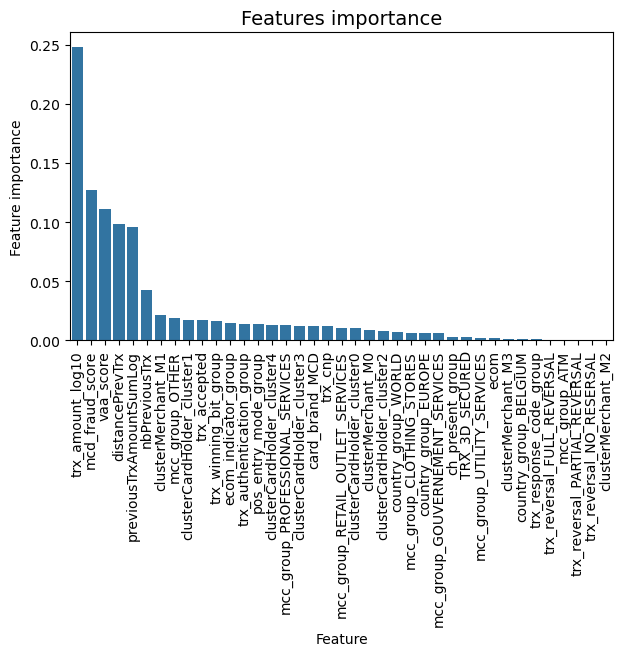

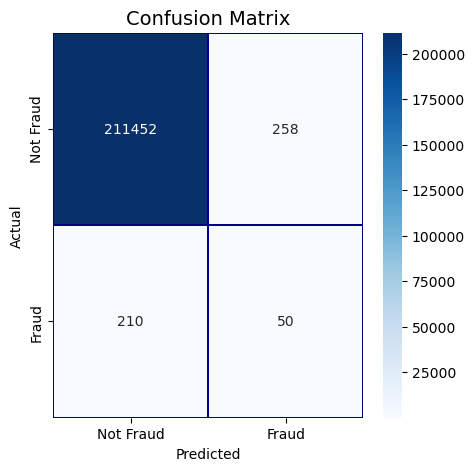

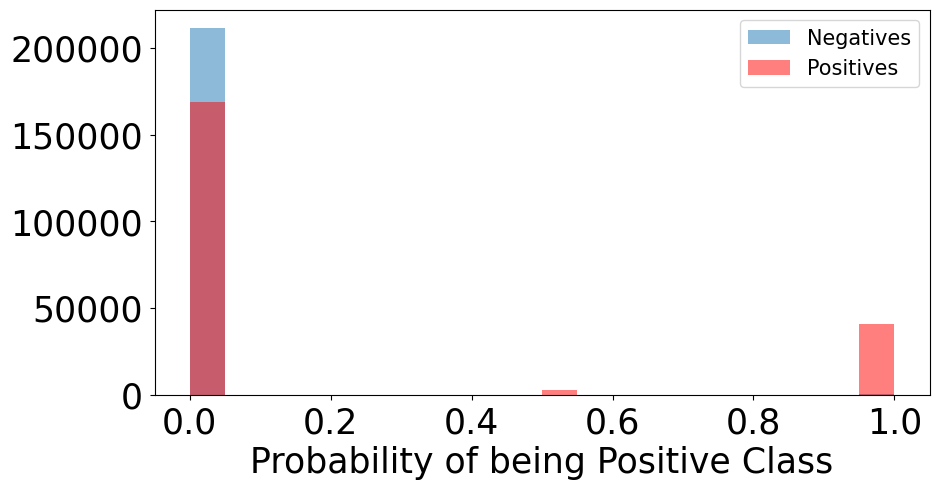

In [6]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from datetime import datetime

then= datetime.now()
predictors = fd.getPredictors(dfTrx)

x_train, x_test, y_train, y_test, scaler =fd.split_data(dfTrx,predictors)

modelClf = DecisionTreeClassifier(random_state=42)
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)

f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')


fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)

fd.show_prediction_graph(modelClf, x_test,y_test)



# Hyperparameters tuning

In [8]:
%%script false

from scipy.stats import randint

modelClf = DecisionTreeClassifier(random_state=42)
dic_param={
    'criterion':["gini","entropy"],
    'max_depth': randint(6,15),
    'min_samples_leaf': randint(5,25),
    'min_samples_split': randint(20,40),
    'class_weight':[class_weightFound]
}

res=fd.hyperparameterSelectionRandomizedSearchCV(modelClf, dic_param, 'f1', dfTrx, predictors, [], None)
print(res)


#{'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 21, 'min_samples_split': 27}
#0.2455374569313507
#score   0.31947483588621445
#scoref1 0.31947483588621445



Couldn't find program: 'false'


In [ ]:
#%%script false

modelClf = DecisionTreeClassifier(random_state=42)
# starting point n_estimators=100,  max_depth=7 
dic_param={
    'criterion':["gini","entropy"],
    'max_depth': [5,6,7,8,9],
    'min_samples_leaf': [18,19,20],
    'min_samples_split': [24,25,26],
    'class_weight':[class_weightFound]
}



res=fd.hyperparameterSelectionGridSearchCV(modelClf, dic_param, 'f1', dfTrx, predictors, [], None)
print(res)


#{'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 26}
#0.258658917177815
#scoref1 0.30407523510971785

#{'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 25}
#0.2603647920532186
#scoref1 0.30460448642266824


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 1/90] START class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, min_samples_leaf=18, min_samples_split=24
[CV 1/5; 1/90] END class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, min_samples_leaf=18, min_samples_split=24;, score=0.287 total time=   5.9s
[CV 2/5; 1/90] START class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, min_samples_leaf=18, min_samples_split=24
[CV 2/5; 1/90] END class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, min_samples_leaf=18, min_samples_split=24;, score=0.250 total time=   5.2s
[CV 3/5; 1/90] START class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, min_samples_leaf=18, min_samples_split=24
[CV 3/5; 1/90] END class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, min_samples_leaf=18, min_samples_split=24;, score=0.206 total time=   5.7s
[CV 4/5; 1/90] START class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, min_samples_leaf=18, min_samples_split=24
[CV 4/5; 1/9

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from datetime import datetime

then= datetime.now()
predictors = fd.getPredictors(dfTrx)

x_train, x_test, y_train, y_test, scaler =fd.split_data(dfTrx,predictors)

modelClf = DecisionTreeClassifier(random_state=42)
parameters={'criterion': criterionFound, 'max_depth': max_depthFound, 
            'min_samples_leaf': min_samples_leafFound, 'min_samples_split': min_samples_splitFound,
            'class_weight':class_weightFound}
modelClf.set_params(**parameters)

modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)
resultMd.update_time_response_result(packageName,classifierName,'2-After tuning', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
resultMd.update_performance_test_result(packageName,classifierName,'2-After tuning', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test,'../imgs/FD06A-DecisionTreeClassifierProbaHistogram' if saveImage else None)
#fd.show_precision_recall_curve(modelClf,x_train,y_train,x_test,y_test)


In [ ]:
files = fd.getAllFiles()

range = []
f1s = []
rocs = []
loop =0
for file in files:
    loop=loop+1
    range.append(loop)
    print(file)
  
    dfTrx = pd.read_csv('../data/cleaned/'+source+file)
    predictors = fd.getPredictors(dfTrx)

    preds = modelClf.predict(dfTrx[predictors])

    f1,mcc,roc= fd.print_scores(dfTrx['Class'], preds,'All', True)
    #fd.show_importance(modelClf,predictors)
    fd.show_confusion_matrix(dfTrx['Class'], preds)
    f1s.append(f1)
    rocs.append(roc)

fd.plt_train_test(range, f1s)
resultMd.update_performance_nextdays_result(packageName,classifierName,extraParameterName, f1s[0],f1s[1],f1s[2],f1s[3],rocs[0],rocs[1],rocs[2],rocs[3])

